In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
import cv2
import matplotlib.pyplot as plt
from collections import Counter

In [3]:
images_folder = "drive/MyDrive/flickr5k/images"
captions_file = "drive/MyDrive/flickr5k/captions.txt"

# Caption

In [4]:
caseInsensitivityList = []

f = open(captions_file, 'r')
for line in f:
    caption = line.split(",")[1].replace("\"", "").replace(".", "").strip().lower()
    for word in caption.split():
        caseInsensitivityList.append(word)
f.close()

In [5]:
# case insensitivity
caseInsensitivityCounter = Counter(caseInsensitivityList)
print(caseInsensitivityCounter.most_common(25))

[('a', 40737), ('in', 12264), ('the', 10283), ('on', 6908), ('man', 6009), ('is', 5600), ('and', 5342), ('with', 4801), ('of', 4660), ('two', 3477), ('boy', 3171), ('woman', 2987), ('girl', 2884), ('young', 2377), ('wearing', 2362), ('are', 2330), ('people', 2240), ('to', 2061), ('at', 1957), ('red', 1781), ('an', 1776), ('his', 1566), ('white', 1557), ('blue', 1536), ('shirt', 1496)]


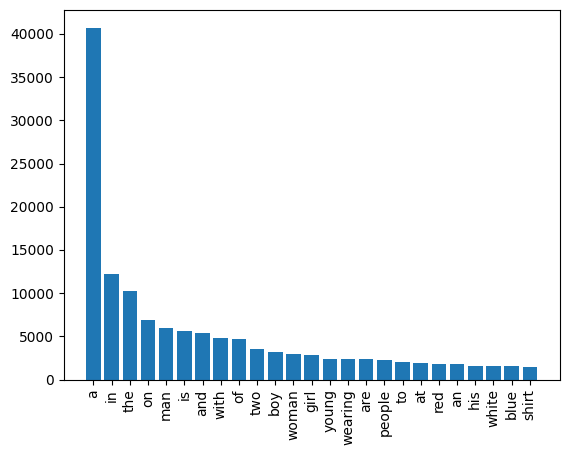

In [6]:
y = [count for word, count in caseInsensitivityCounter.most_common(25)]
x = [word for word, count in caseInsensitivityCounter.most_common(25)]
plt.bar(x, y)
plt.xticks(rotation = 'vertical')
plt.show()

In [7]:
leastCount = caseInsensitivityCounter.most_common()[-1][1]
print(leastCount)


1


In [8]:
leastCountSum = 0
for word, count in caseInsensitivityCounter.items():
    if count == leastCount:
        leastCountSum += 1
print(leastCountSum)


3076


# Image

In [9]:
#@title Import data
# Images size in KB, from flickr5k/images using command 'ls -l', preprocesed by selecting size only and changing from B to KB 
sizes = [130.568, 101.546, 89.981, 118.882, 106.775, 113.035, 82.865, 73.304, 100.419, 121.368, 98.071, 83.643, 70.919, 127.203, 97.502, 82.36, 60.116, 65.485, 80.184, 101.852, 67.99, 62.183, 96.931, 84.153, 117.05, 49.047, 76.563, 62.653, 59.832, 106.505, 96.002, 75.091, 60.536, 96.662, 77.562, 112.027, 100.896, 118.768, 96.316, 77.561, 112.179, 90.731, 130.582, 104.254, 102.098, 72.952, 93.674, 100.266, 83.252, 109.046, 131.397, 75.478, 90.497, 127.552, 91.634, 103.68, 90.699, 125.862, 127.478, 85.143, 83.475, 97.456, 69.241, 47.054, 124.444, 68.243, 102.51, 106.868, 100.222, 119.652, 107.71, 61.122, 100.445, 52.231, 151.01, 172.042, 96.546, 94.352, 92.476, 101.505, 102.394, 118.069, 154.048, 114.936, 76.438, 99.462, 88.678, 60.98, 79.102, 101.031, 27.701, 49.487, 71.726, 120.25, 108.439, 135.239, 67.077, 106.93, 140.044, 128.4, 97.303, 117.996, 97.148, 94.936, 71.715, 81.939, 94.158, 90.13, 83.642, 91.658, 114.464, 95.88, 84.403, 71.607, 57.379, 123.86, 85.1, 70.254, 97.256, 92.979, 88.09, 118.297, 95.978, 104.98, 72.453, 121.118, 90.47, 121.058, 89.322, 85.525, 125.795, 79.087, 56.324, 87.793, 88.878, 141.908, 86.609, 129.854, 95.364, 84.929, 74.452, 91.523, 114.043, 67.579, 49.64, 95.577, 126.89, 87.77, 48.296, 64.449, 82.832, 80.219, 62.161, 101.258, 99.581, 94.398, 120.897, 57.904, 80.628, 59.04, 86.123, 72.215, 70.221, 126.486, 92.906, 105.024, 107.158, 90.594, 142.939, 137.601, 67.143, 89.393, 115.644, 143.962, 75.083, 82.304, 65.556, 109.4, 74.101, 116.361, 92.958, 86.188, 69.249, 110.706, 76.152, 90.538, 44.031, 86.097, 78.249, 90.532, 96.443, 136.54, 169.095, 122.076, 84.859, 106.672, 80.21, 85.439, 121.847, 68.637, 124.434, 149.242, 131.544, 115.05, 58.22, 111.31, 92.142, 88.464, 78.714, 46.814, 105.071, 64.815, 65.423, 113.399, 61.916, 61.706, 83.317, 145.95, 85.17, 137.169, 124.073, 130.128, 133.874, 119.192, 97.428, 174.923, 78.074, 94.743, 143.516, 108.252, 82.683, 112.42, 86.777, 129.896, 111.146, 131.096, 110.458, 77.083, 134.145, 79.351, 81.791, 93.915, 85.948, 62.421, 113.546, 118.448, 131.223, 112.794, 96.114, 77.351, 99.082, 89.596, 70.351, 134.72, 107.455, 169.106, 101.569, 71.943, 79.758, 83.831, 76.109, 59.005, 87.512, 59.937, 83.733, 133.744, 82.872, 70.279, 63.252, 132.038, 85.809, 83.011, 61.769, 99.082, 64.138, 97.197, 99.708, 72.573, 85.876, 63.328, 123.458, 81.584, 80.666, 116.406, 159.061, 102.241, 71.091, 111.18, 61.724, 79.328, 128.97, 109.493, 75.104, 109.5, 64.877, 99.784, 79.523, 71.055, 68.431, 89.339, 200.614, 66.567, 115.244, 160.533, 137.839, 115.989, 74.542, 81.607, 146.622, 124.826, 84.734, 80.425, 74.178, 92.498, 103.258, 111.768, 94.37, 123.425, 181.658, 80.534, 127.174, 106.428, 111.246, 112.191, 87.254, 104.719, 80.335, 134.843, 109.906, 145.705, 102.563, 80.275, 96.327, 113.332, 82.495, 117.744, 94.544, 52.141, 105.413, 172.636, 114.976, 132.944, 110.037, 92.347, 141.225, 163.736, 66.201, 56.226, 68.789, 76.46, 84.277, 123.958, 113.486, 104.86, 141.552, 92.644, 82.489, 147.79, 66.281, 75.902, 119.501, 144.563, 119.833, 58.059, 101.059, 57.151, 86.082, 95.852, 72.601, 108.148, 135.183, 102.969, 68.194, 89.707, 81.083, 121.017, 118.559, 138.397, 97.265, 78.259, 92.014, 138.418, 112.388, 126.73, 94.11, 161.165, 107.334, 150.163, 86.949, 75.76, 84.68, 82.951, 95.167, 81.327, 136.042, 46.249, 51.93, 100.994, 105.626, 128.732, 72.189, 95.501, 101.728, 89.473, 84.11, 72.581, 102.689, 75.725, 109.121, 82.475, 63.614, 59.156, 80.26, 96.192, 51.128, 95.534, 60.078, 66.981, 107.531, 93.865, 88.846, 88.664, 122.792, 177.401, 168.025, 112.974, 83.786, 104.283, 151.799, 79.682, 112.419, 52.7, 105.034, 106.906, 80.778, 90.235, 88.543, 103.19, 68.986, 79.187, 106.706, 134.23, 51.679, 103.921, 87.612, 141.506, 96.859, 93.717, 103.277, 74.49, 47.989, 115.399, 101.291, 90.826, 131.036, 95.128, 89.783, 99.87, 103.91, 81.727, 145.508, 146.731, 93.977, 131.363, 89.261, 90.189, 87.089, 87.623, 87.465, 91.628, 111.634, 83.891, 163.718, 146.888, 175.411, 111.536, 78.379, 101.621, 145.001, 150.059, 92.443, 89.99, 66.846, 105.632, 68.391, 92.595, 86.323, 80.891, 84.772, 138.22, 133.051, 111.052, 96.451, 163.139, 101.952, 117.354, 106.999, 122.288, 104.178, 89.714, 81.894, 101.335, 89.884, 100.32, 133.065, 108.419, 125.992, 131.83, 75.841, 88.984, 108.559, 67.393, 69.76, 85.213, 140.157, 110.369, 80.197, 114.219, 132.508, 73.063, 132.603, 187.254, 72.434, 76.643, 70.504, 116.652, 100.007, 98.112, 110.916, 109.22, 95.097, 113.117, 107.011, 112.321, 83.52, 91.235, 77.198, 57.814, 83.283, 106.251, 112.362, 101.937, 51.668, 56.211, 96.597, 73.733, 76.584, 77.801, 66.534, 97.157, 84.568, 77.262, 82.615, 96.557, 83.3, 64.734, 86.715, 89.493, 116.822, 124.59, 105.983, 43.388, 78.304, 96.698, 76.24, 88.414, 83.545, 92.94, 98.78, 68.919, 101.982, 66.967, 76.559, 78.09, 76.836, 88.766, 69.807, 125.004, 86.632, 70.905, 85.402, 155.813, 80.099, 67.062, 102.833, 80.753, 73.994, 116.929, 133.038, 49.514, 96.716, 63.705, 88.613, 79.633, 86.153, 70.738, 98.727, 60.537, 78.348, 81.097, 116.4, 68.84, 112.928, 80.846, 100.907, 74.638, 96.58, 108.524, 64.094, 125.392, 105.878, 75.755, 118.793, 41.865, 96.36, 123.384, 125.39, 90.911, 73.72, 123.848, 124.989, 128.199, 133.336, 85.079, 69.955, 119.848, 77.703, 98.765, 57.126, 107.507, 96.003, 52.496, 116.358, 74.752, 106.495, 108.305, 111.241, 100.747, 177.333, 97.002, 110.964, 77.832, 110.643, 62.902, 101.742, 114.645, 91.474, 95.686, 76.499, 119.374, 105.885, 91.887, 86.571, 112.382, 50.48, 128.617, 130.624, 67.347, 61.206, 94.466, 95.783, 89.247, 62.139, 120.605, 143.335, 56.735, 86.234, 65.129, 60.041, 70.803, 93.288, 67.616, 102.589, 104.532, 86.215, 141.153, 96.52, 73.637, 94.26, 103.42, 72.178, 113.301, 89.866, 94.265, 74.274, 91.009, 69.987, 92.789, 54.78, 127.534, 80.471, 125.568, 75.752, 92.076, 91.307, 90.463, 95.624, 85.942, 108.902, 47.608, 91.009, 147.685, 97.696, 61.927, 113.76, 30.72, 75.018, 114.381, 81.807, 83.649, 102.394, 55.975, 97.605, 77.144, 52.737, 88.714, 108.202, 127.275, 111.859, 94.699, 84.888, 82.364, 118.529, 114.725, 74.549, 68.947, 132.44, 121.284, 98.428, 121.596, 64.831, 126.853, 74.483, 132.822, 50.435, 59.772, 75.726, 85.821, 48.533, 60.01, 63.615, 127.975, 82.707, 67.629, 84.776, 112.778, 70.418, 90.475, 101.373, 51.219, 119.919, 77.505, 52.992, 101.211, 60.897, 101.768, 121.361, 74.124, 100.792, 106.657, 78.694, 70.74, 53.495, 87.74, 47.57, 75.217, 106.562, 68.781, 101.528, 60.738, 66.424, 75.473, 92.594, 96.649, 65.665, 105.557, 124.342, 54.532, 94.602, 123.773, 84.338, 109.427, 104.692, 72.107, 104.229, 128.867, 76.679, 129.429, 102.557, 146.965, 86.197, 104.978, 77.644, 115.307, 64.63, 165.649, 112.14, 70.126, 118.322, 73.875, 65.267, 56.99, 72.351, 90.513, 96.917, 88.005, 102.071, 129.254, 119.646, 87.282, 73.307, 63.416, 128.647, 83.237, 90.819, 89.028, 83.853, 119.828, 74.863, 146.106, 58.991, 60.168, 127.307, 81.664, 90.14, 57.406, 122.746, 125.403, 84.362, 104.978, 88.876, 111.591, 106.37, 126.368, 82.287, 117.881, 68.729, 119.408, 82.826, 125.564, 77.942, 99.621, 104.999, 87.381, 119.618, 94.828, 78.966, 96.168, 79.462, 96.093, 109.345, 54.272, 68.003, 91.336, 68.465, 107.647, 141.477, 74.868, 46.671, 93.432, 93.779, 77.481, 116.861, 60.227, 54.409, 62.284, 75.151, 31.061, 70.445, 126.691, 135.52, 72.239, 105.044, 88.704, 129.14, 105.179, 57.368, 135.436, 125.548, 104.823, 111.845, 82.368, 113.993, 88.439, 116.471, 57.759, 83.768, 99.6, 45.186, 84.547, 46.661, 71.022, 86.554, 44.062, 92.795, 63.406, 169.264, 159.969, 83.58, 80.141, 96.393, 66.228, 113.626, 97.918, 72.992, 80.492, 62.099, 99.794, 57.306, 95.759, 66.09, 90.633, 72.443, 85.251, 79.676, 80.709, 81.445, 60.046, 92.177, 79.277, 196.565, 78.268, 63.526, 94.814, 109.243, 146.209, 56.524, 103.278, 61.723, 91.445, 123.446, 138.625, 103.584, 52.738, 110.578, 87.179, 76.534, 83.729, 133.763, 64.76, 135.958, 105.106, 124.886, 48.985, 141.349, 74.304, 56.81, 62.221, 88.865, 54.252, 89.109, 114.095, 103.489, 105.149, 93.495, 99.705, 79.825, 87.332, 58.554, 118.963, 93.072, 111.703, 113.768, 107.301, 147.436, 75.351, 57.778, 88.206, 38.301, 74.73, 85.907, 94.671, 111.292, 128.275, 67.859, 87.507, 78.019, 82.916, 73.293, 120.257, 92.123, 108.113, 78.236, 90.225, 44.01, 110.428, 83.96, 134.667, 61.137, 123.511, 72.416, 91.392, 52.171, 94.949, 91.321, 81.423, 114.109, 118.132, 65.566, 66.545, 70.251, 76.014, 126.726, 105.074, 122.819, 128.061, 98.606, 140.655, 73.598, 96.583, 60.122, 199.862, 85.715, 110.531, 138.568, 82.514, 45.261, 89.201, 115.267, 77.742, 126.3, 135.93, 114.097, 87.927, 123.876, 87.787, 107.057, 77.785, 77.592, 71.931, 117.739, 96.285, 103.753, 60.893, 34.678, 33.654, 79.638, 101.473, 53.746, 129.528, 118.596, 88.548, 57.845, 62.864, 123.768, 100.491, 159.745, 68.136, 96.85, 42.336, 131.676, 64.098, 83.679, 113.903, 116.93, 70.372, 86.19, 123.95, 117.068, 91.477, 71.104, 81.048, 91.463, 51.986, 118.638, 87.598, 148.467, 97.927, 114.388, 98.896, 73.039, 106.452, 90.365, 73.646, 161.619, 87.144, 144.068, 170.133, 105.509, 101.946, 117.42, 87.004, 79.05, 53.819, 103.921, 61.145, 110.253, 100.474, 80.211, 82.824, 91.974, 66.934, 86.474, 75.205, 76.784, 69.021, 72.171, 102.39, 70.082, 74.733, 103.475, 130.635, 91.719, 55.785, 70.319, 85.104, 87.198, 88.861, 79.358, 84.836, 90.168, 102.829, 96.183, 76.483, 74.462, 85.525, 114.51, 73.398, 67.524, 95.551, 125.975, 79.014, 62.734, 76.397, 76.278, 73.087, 71.164, 64.231, 73.484, 67.077, 60.744, 66.185, 68.85, 119.274, 129.631, 77.429, 85.823, 111.794, 123.663, 127.991, 85.265, 67.127, 43.261, 73.758, 58.209, 105.44, 82.016, 100.428, 81.361, 107.677, 80.812, 58.869, 74.008, 97.542, 111.304, 73.447, 67.044, 87.117, 151.851, 84.668, 94.557, 80.208, 53.579, 73.004, 92.624, 136.413, 54.025, 109.61, 58.165, 95.756, 96.943, 97.596, 114.515, 103.345, 132.708, 80.001, 70.068, 58.103, 84.549, 111.849, 77.646, 123.519, 85.249, 135.835, 151.408, 93.699, 95.564, 110.314, 82.453, 90.455, 134.864, 92.308, 51.444, 102.597, 115.757, 79.491, 80.01, 117.087, 33.232, 102.431, 116.768, 75.72, 80.554, 83.699, 79.893, 73.465, 135.777, 94.973, 99.438, 127.31, 123.262, 82.286, 91.946, 117.623, 133.031, 126.163, 82.829, 134.54, 132.978, 109.653, 116.1, 96.051, 120.293, 61.858, 104.282, 67.089, 77.616, 100.915, 82.698, 127.095, 70.137, 95.912, 119.909, 129.92, 111.938, 89.24, 107.555, 69.811, 74.701, 65.087, 100.987, 82.591, 87.659, 81.687, 66.813, 75.443, 95.95, 142.808, 61.908, 71.766, 110.865, 71.832, 154.187, 105.554, 136.512, 143.711, 48.891, 56.735, 97.513, 82.172, 121.338, 119.161, 129.058, 117.411, 65.778, 104.825, 113.852, 115.142, 148.845, 98.046, 77.274, 102.748, 78.887, 121.059, 84.429, 46.814, 69.233, 100.986, 50.381, 101.686, 126.463, 100.608, 93.362, 80.318, 73.351, 96.743, 107.599, 109.282, 103.059, 71.157, 67.354, 90.09, 96.853, 80.681, 114.686, 92.395, 59.132, 100.739, 135.455, 82.321, 98.908, 86.802, 65.486, 105.223, 115.479, 147.994, 123.339, 81.886, 133.495, 122.681, 133.273, 122.869, 108.486, 51.683, 123.878, 108.063, 70.138, 114.748, 81.983, 39.424, 121.092, 152.198, 186.602, 115.665, 85.639, 45.299, 80.21, 46.551, 77.354, 123.414, 118.625, 89.45, 100.256, 132.147, 97.572, 105.388, 100.057, 98.85, 117.254, 106.993, 158.369, 107.638, 75.655, 118.965, 55.293, 82.17, 88.618, 63.104, 131.127, 100.508, 81.756, 141.349, 106.683, 54.237, 80.791, 93.791, 113.985, 136.129, 83.386, 150.859, 95.95, 91.709, 102.764, 126.416, 69.54, 59.717, 108.698, 50.434, 84.661, 99.904, 91.614, 56.338, 123.045, 102.924, 90.752, 70.397, 105.598, 108.483, 135.397, 113.853, 101.169, 122.04, 80.742, 113.688, 106.709, 93.041, 97.719, 91.905, 130.261, 85.322, 105.54, 113.606, 93.688, 111.664, 119.426, 77.12, 80.162, 86.276, 99.923, 143.703, 104.939, 97.817, 147.251, 31.239, 72.566, 47.288, 115.477, 118.699, 67.144, 109.432, 89.797, 118.665, 131.33, 145.127, 71.557, 94.917, 90.905, 66.779, 107.435, 103.453, 97.25, 93.73, 135.589, 69.034, 70.589, 123.18, 64.837, 63.79, 60.922, 65.502, 112.944, 89.302, 104.084, 142.759, 82.189, 65.861, 124.719, 111.285, 117.72, 115.151, 114.497, 103.126, 92.52, 148.848, 136.154, 93.998, 72.919, 70.164, 61.457, 84.504, 80.155, 97.017, 146.883, 129.399, 126.349, 122.677, 95.386, 109.587, 148.589, 95.612, 74.294, 114.125, 95.967, 64.335, 95.418, 90.05, 86.984, 136.318, 136.055, 81.268, 166.587, 108.276, 76.915, 118.556, 112.403, 49.904, 112.531, 91.284, 180.507, 81.991, 109.322, 78.476, 142.546, 77.617, 128.96, 72.531, 75.918, 98.655, 91.583, 97.083, 81.327, 82.977, 121.659, 86.429, 123.258, 112.404, 70.651, 42.701, 66.901, 80.246, 121.578, 70.14, 122.577, 79.836, 99.786, 129.459, 118.702, 66.964, 104.359, 72.46, 90.706, 100.368, 70.006, 52.682, 118.665, 107.102, 97.09, 93.448, 58.594, 90.617, 117.917, 122.64, 75.268, 74.122, 144.242, 80.331, 81.285, 130.02, 73.027, 112.824, 79.855, 87.474, 113.359, 80.148, 95.058, 126.454, 69.438, 134.526, 104.449, 92.319, 142.99, 142.965, 146.584, 65.518, 92.054, 97.178, 27.629, 154.645, 75.638, 92.223, 122.153, 82.684, 83.971, 82.03, 103.352, 77.813, 78.858, 62.552, 59.471, 113.427, 53.376, 57.856, 67.227, 85.604, 130.475, 116.286, 67.213, 97.3, 92.823, 66.685, 115.697, 76.247, 91.977, 57.02, 49.174, 102.949, 124.614, 102.553, 58.653, 96.744, 95.748, 49.243, 149.821, 68.853, 87.016, 117.533, 148.1, 102.148, 83.932, 115.756, 91.421, 96.971, 117.299, 102.895, 101.603, 83.2, 70.466, 83.021, 60.086, 60.021, 127.851, 89.541, 124.192, 127.644, 114.958, 95.035, 78.903, 103.867, 80.122, 118.404, 118.696, 97.101, 116.799, 97.223, 80.894, 87.921, 75.193, 115.206, 163.06, 104.498, 97.931, 80.793, 90.478, 80.841, 83.404, 117.376, 127.689, 72.783, 84.632, 121.444, 101.007, 97.875, 114.97, 124.005, 50.397, 90.949, 87.062, 74.941, 90.271, 82.595, 101.59, 151.344, 68.022, 79.166, 76.808, 168.63, 119.464, 87.8, 94.9, 102.243, 121.915, 87.338, 69.149, 56.442, 49.475, 120.996, 163.362, 66.596, 110.202, 121.71, 88.976, 131.022, 86.255, 75.258, 71.2, 126.907, 107.413, 100.191, 124.868, 131.418, 120.897, 85.138, 61.934, 84.041, 98.351, 118.729, 162.302, 121.869, 92.766, 79.865, 88.801, 108.984, 140.393, 67.602, 88.876, 87.667, 59.179, 79.894, 117.585, 110.004, 48.091, 138.833, 92.577, 115.125, 105.587, 135.467, 85.355, 78.372, 146.799, 87.458, 99.93, 99.081, 91.621, 80.677, 73.218, 128.675, 55.419, 84.43, 150.055, 113.441, 79.411, 117.71, 98.246, 88.801, 114.496, 95.585, 109.667, 112.567, 76.442, 119.6, 101.478, 68.778, 74.296, 60.256, 127.549, 59.968, 88.21, 105.193, 160.196, 82.409, 71.253, 87.94, 64.396, 135.979, 83.707, 93.862, 84.934, 88.82, 74.491, 79.764, 100.908, 105.489, 106.162, 99.222, 88.16, 99.474, 97.625, 148.627, 82.702, 122.835, 92.325, 109.894, 118.503, 103.145, 105.09, 85.881, 144.036, 104.977, 49.762, 66.279, 70.023, 94.916, 88.291, 81.347, 75.04, 104.137, 109.888, 83.093, 65.597, 69.946, 91.892, 81.071, 130.851, 84.216, 94.078, 74.368, 123.546, 74.054, 111.278, 90.825, 134.213, 74.303, 59.757, 113.02, 120.878, 100.279, 58.383, 74.341, 76.292, 129.556, 109.666, 94.163, 79.187, 80.361, 110.268, 57.27, 136.837, 108.714, 145.411, 106.913, 110.099, 116.763, 73.036, 146.891, 71.938, 86.654, 109.584, 148.202, 75.311, 99.439, 62.19, 76.124, 83.464, 85.659, 56.938, 72.527, 86.916, 94.703, 126.414, 62.954, 171.89, 98.476, 96.076, 63.175, 135.951, 85.496, 82.476, 97.666, 109.139, 106.867, 88.825, 114.399, 89.786, 135.346, 161.382, 90.768, 146.422, 134.029, 87.129, 128.68, 94.642, 65.276, 136.53, 121.873, 56.886, 85.553, 74.924, 101.344, 125.96, 80.221, 115.43, 123.769, 119.172, 147.649, 135.447, 99.025, 82.26, 126.097, 94.39, 67.636, 87.811, 89.899, 46.193, 125.337, 140.184, 174.406, 106.871, 107.123, 101.936, 78.107, 49.716, 65.103, 76.914, 97.789, 159.124, 121.709, 115.725, 78.352, 103.349, 76.126, 134.98, 61.547, 104.269, 116.3, 82.911, 81.222, 101.797, 102.002, 62.931, 84.035, 96.611, 86.249, 167.976, 78.961, 67.346, 82.163, 123.526, 104.821, 62.329, 81.405, 42.011, 83.213, 47.428, 89.561, 92.712, 92.163, 93.31, 117.234, 60.203, 76.847, 127.789, 83.419, 128.744, 129.847, 84.813, 75.329, 114.037, 59.266, 84.961, 114.031, 117.721, 77.339, 92.37, 218.994, 97.836, 119.752, 108.778, 100.887, 127.452, 96.816, 104.172, 137.222, 95.848, 100.641, 101.801, 112.004, 78.846, 89.092, 107.558, 101.201, 107.579, 86.196, 86.979, 131.004, 51.188, 71.635, 54.482, 85.575, 98.793, 114.912, 140.039, 91.859, 166.13, 130.371, 93.895, 103.317, 136.955, 135.252, 65.937, 75.498, 91.269, 94.037, 72.341, 71.613, 70.803, 117.878, 97.615, 102.777, 130.824, 151.641, 48.718, 53.578, 51.115, 70.239, 84.406, 144.736, 73.744, 121.137, 79.442, 72.731, 49.284, 62.292, 69.156, 56.453, 118.092, 57.575, 70.852, 82.511, 57.027, 118.841, 80.172, 114.458, 89.032, 69.192, 136.789, 82.387, 106.52, 73.945, 141.703, 122.779, 92.62, 85.899, 94.351, 123.855, 86.698, 123.423, 87.125, 118.658, 131.085, 77.712, 84.387, 76.451, 70.817, 93.594, 57.751, 66.537, 111.582, 108.432, 75.779, 56.72, 93.967, 71.8, 79.851, 101.774, 93.537, 101.287, 76.575, 110.71, 130.521, 129.224, 93.81, 124.971, 78.242, 71.626, 99.223, 117.855, 126.77, 79.816, 86.077, 126.315, 80.476, 103.182, 67.118, 84.495, 98.896, 89.924, 77.646, 99.731, 96.648, 136.695, 119.739, 61.682, 100.02, 93.496, 96.991, 87.012, 105.655, 109.661, 153.297, 91.537, 88.237, 128.693, 106.482, 65.402, 75.074, 86.413, 144.653, 97.359, 106.023, 109.376, 117.048, 92.385, 114.389, 54.236, 93.051, 66.381, 104.366, 68.574, 101.926, 142.593, 65.169, 104.858, 64.188, 88.002, 89.823, 88.155, 59.589, 92.343, 71.553, 93.717, 100.147, 105.933, 90.325, 63.344, 63.082, 41.58, 80.768, 68.036, 108.228, 71.061, 72.179, 70.634, 139.524, 135.975, 56.022, 100.325, 105.518, 54.766, 105.039, 85.266, 119.849, 76.768, 86.27, 153.88, 127.828, 92.862, 130.52, 124.563, 77.151, 40.712, 87.905, 122.233, 89.203, 104.446, 138.501, 80.333, 80.729, 71.776, 101.729, 103.563, 112.456, 75.275, 146.199, 107.494, 100.085, 85.351, 87.389, 62.414, 128.24, 112.188, 110.64, 71.748, 122.606, 112.535, 108.095, 97.721, 96.986, 103.423, 184.255, 68.1, 120.015, 95.804, 85.874, 117.888, 79.284, 74.174, 83.517, 85.861, 111.269, 86.38, 104.282, 96.923, 93.456, 82.775, 92.222, 161.574, 56.358, 126.741, 110.992, 99.062, 123.024, 60.612, 74.632, 90.4, 87.918, 124.092, 125.804, 77.45, 74.333, 101.798, 84.98, 76.832, 80.114, 58.604, 130.35, 82.596, 123.164, 83.745, 161.167, 55.794, 81.522, 186.021, 98.596, 98.483, 94.42, 103.949, 58.364, 92.943, 70.491, 86.693, 49.398, 93.511, 125.005, 56.5, 97.808, 77.511, 73.182, 93.29, 89.346, 86.828, 118.729, 105.783, 112.181, 98.536, 106.007, 80.183, 86.095, 134.175, 107.707, 110.695, 126.365, 84.846, 90.833, 82.293, 124.472, 133.683, 189.719, 99.151, 67.701, 101.546, 107.563, 55.127, 97.106, 74.121, 109.689, 102.588, 173.321, 93.49, 113.065, 107.649, 91.378, 50.773, 74.411, 109.16, 127.876, 92.826, 58.249, 101.515, 95.807, 89.19, 112.035, 94.713, 77.114, 77.648, 82.484, 146.703, 132.416, 92.314, 114.826, 81.841, 93.072, 107.283, 94.592, 89.452, 98.496, 115.186, 116.414, 65.094, 90.886, 76.439, 68.317, 106.731, 87.812, 111.869, 78.993, 81.58, 126.441, 119.977, 55.617, 107.778, 102.045, 84.073, 106.433, 74.069, 146.299, 126.189, 93.527, 87.603, 90.121, 71.474, 113.039, 83.223, 94.596, 77.246, 79.416, 116.674, 116.359, 91.878, 117.098, 113.192, 105.216, 122.513, 109.182, 132.648, 74.426, 85.971, 103.058, 79.841, 66.847, 74.311, 76.605, 134.932, 79.613, 51.941, 59.268, 77.537, 77.556, 76.977, 77.988, 84.392, 134.545, 37.161, 113.848, 75.701, 77.737, 107.887, 125.369, 119.604, 96.282, 73.349, 77.506, 79.969, 69.362, 119.978, 110.953, 95.705, 81.582, 73.408, 82.562, 65.208, 74.936, 86.134, 68.585, 93.625, 86.702, 77.767, 77.189, 125.043, 109.384, 114.804, 144.693, 49.141, 71.147, 84.061, 134.785, 89.88, 121.504, 74.39, 157.852, 122.402, 56.206, 70.783, 95.972, 54.722, 85.466, 116.157, 113.463, 68.292, 35.748, 75.278, 104.087, 83.465, 114.802, 136.3, 77.811, 68.575, 71.699, 98.668, 99.378, 94.068, 100.838, 57.983, 111.193, 105.022, 128.553, 127.539, 91.976, 51.817, 48.703, 102.015, 126.588, 104.725, 72.906, 106.297, 82.658, 118.79, 108.24, 60.861, 109.96, 113.831, 129.776, 84.949, 91.715, 107.709, 77.281, 65.517, 100.062, 68.342, 133.712, 70.797, 108.207, 94.791, 98.631, 52.999, 83.136, 107.47, 90.45, 98.337, 101.489, 72.68, 81.507, 122.059, 80.032, 108.189, 142.287, 64.594, 134.913, 123.29, 108.429, 130.371, 102.148, 77.729, 76.302, 120.661, 91.794, 93.98, 66.854, 137.785, 125.364, 79.519, 136.914, 61.603, 123.418, 110.67, 103.676, 99.703, 120.786, 99.607, 133.605, 108.671, 98.378, 81.861, 71.854, 70.886, 132.299, 75.78, 102.866, 75.012, 91.086, 34.72, 82.268, 86.522, 76.64, 93.284, 130.005, 59.568, 88.238, 119.287, 40.928, 80.188, 96.957, 61.465, 104.003, 93.426, 74.58, 134.449, 131.55, 88.739, 110.494, 120.083, 116.479, 58.932, 100.173, 107.632, 105.105, 183.114, 90.566, 68.741, 61.497, 71.444, 77.836, 69.416, 79.565, 90.371, 105.97, 97.743, 121.315, 58.93, 87.268, 97.011, 84.933, 78.936, 99.776, 64.999, 126.859, 98.152, 118.534, 72.724, 63.995, 129.978, 76.786, 101.115, 82.93, 105.299, 100.73, 116.176, 121.062, 120.642, 116.005, 115.009, 89.99, 91.279, 135.041, 71.428, 85.417, 58.013, 112.76, 74.16, 76.483, 118.422, 55.798, 57.92, 96.789, 48.358, 60.6, 107.139, 88.043, 79.725, 56.434, 98.082, 77.533, 56.391, 71.126, 88.503, 65.792, 114.038, 83.049, 97.067, 112.906, 94.062, 116.33, 99.692, 65.82, 90.812, 91.559, 86.713, 99.638, 105.226, 130.565, 125.287, 100.507, 78.965, 61.921, 105.378, 92.944, 64.582, 73.668, 97.093, 86.092, 68.121, 73.247, 71.959, 53.983, 89.767, 137.95, 104.719, 140.176, 68.622, 86.186, 103.886, 127.029, 124.246, 90.477, 108.897, 73.037, 81.685, 144.785, 118.109, 88.548, 142.259, 61.187, 90.305, 76.946, 140.262, 149.456, 88.078, 52.572, 93.508, 49.345, 113.715, 74.548, 63.06, 64.057, 109.337, 77.26, 58.014, 106.841, 72.944, 116.521, 90.233, 115.702, 127.966, 103.879, 71.572, 121.19, 89.071, 93.967, 60.804, 66.092, 69.709, 77.441, 83.32, 90.218, 93.03, 109.378, 151.461, 77.08, 84.708, 77.748, 63.347, 107.942, 115.202, 53.67, 85.612, 63.531, 82.152, 72.085, 92.378, 107.484, 92.556, 105.123, 112.255, 117.655, 117.47, 118.062, 88.262, 84.525, 108.923, 103.015, 82.156, 106.498, 99.684, 124.666, 63.873, 109.26, 75.173, 70.135, 97.898, 97.82, 77.634, 59.566, 87.171, 85.764, 84.548, 66.93, 74.723, 75.383, 132.372, 137.823, 82.034, 67.37, 126.688, 95.244, 146.892, 90.974, 72.818, 64.134, 85.339, 70.243, 95.011, 128.62, 110.151, 79.901, 69.194, 90.973, 101.45, 127.478, 93.348, 78.358, 93.368, 103.902, 162.125, 54.255, 95.324, 80.531, 129.524, 94.909, 106.591, 115.284, 82.556, 98.595, 98.158, 46.636, 104.094, 112.655, 129.167, 82.893, 77.26, 102.705, 96.63, 104.512, 100.826, 71.432, 100.575, 127.31, 95.215, 73.934, 87.127, 122.625, 59.901, 121.843, 46.688, 119.648, 118.1, 73.51, 84.042, 103.301, 108.082, 100.728, 128.594, 82.729, 131.991, 105.786, 88.137, 101.903, 123.799, 84.071, 111.918, 45.662, 68.358, 65.149, 142.749, 100.939, 74.481, 98.387, 59.08, 80.735, 64.284, 43.569, 88.022, 93.033, 96.797, 105.46, 58.94, 73.988, 89.832, 119.975, 127.797, 64.879, 78.901, 57.979, 77.676, 80.334, 77.731, 85.106, 118.083, 131.751, 110.442, 109.175, 55.595, 71.695, 71.137, 62.222, 80.967, 55.696, 70.414, 150.224, 89.783, 98.264, 54.61, 111.664, 148.646, 41.987, 80.706, 86.814, 64.495, 136.034, 91.513, 86.256, 92.704, 112.274, 93.782, 59.42, 143.039, 122.871, 82.279, 58.322, 98.061, 83.672, 103.3, 154.439, 109.436, 97.446, 83.41, 91.62, 102.787, 68.126, 55.302, 93.625, 72.589, 123.116, 87.565, 107.129, 99.845, 74.739, 47.801, 117.2, 105.453, 132.936, 88.378, 57.027, 70.236, 85.781, 77.421, 87.749, 158.658, 115.454, 68.868, 71.74, 87.28, 63.711, 116.371, 105.772, 106.66, 122.042, 72.168, 110.069, 114.964, 64.135, 123.597, 51.918, 92.473, 82.003, 98.833, 58.054, 73.058, 62.111, 99.953, 104.093, 64.959, 48.563, 112.083, 62.438, 58.088, 101.467, 73.541, 53.338, 95.15, 140.772, 99.676, 63.382, 85.914, 88.933, 94.554, 62.746, 74.094, 80.267, 41.971, 79.052, 101.629, 91.262, 142.808, 73.308, 133.238, 96.88, 106.596, 110.66, 115.749, 114.394, 99.289, 106.774, 137.947, 105.922, 57.876, 113.331, 74.085, 75.306, 109.886, 111.439, 81.903, 85.265, 118.175, 36.438, 71.758, 86.64, 82.571, 127.61, 61.314, 68.371, 85.783, 82.755, 103.996, 60.688, 101.177, 73.746, 76.313, 64.759, 136.824, 97.574, 51.855, 48.85, 87.89, 83.88, 106.535, 105.533, 88.128, 66.957, 103.117, 122.678, 136.08, 86.102, 81.852, 103.417, 90.087, 82.916, 80.179, 119.707, 87.299, 55.65, 93.589, 146.393, 56.121, 100.266, 128.402, 51.626, 61.895, 71.787, 104.589, 77.269, 73.092, 70.542, 72.703, 88.969, 135.42, 73.53, 98.403, 51.825, 80.975, 40.548, 121.646, 86.946, 107.466, 88.843, 57.195, 78.805, 72.747, 37.877, 99.669, 77.893, 81.331, 125.195, 119.182, 78.306, 126.739, 120.683, 91.011, 69.918, 130.189, 65.061, 92.841, 87.82, 77.979, 119.508, 81.916, 62.806, 57.933, 94.19, 61.843, 70.912, 46.787, 148.806, 80.739, 106.2, 80.772, 114.204, 81.179, 115.099, 103.672, 45.657, 118.399, 97.152, 106.275, 105.154, 100.689, 98.977, 75.206, 63.412, 87.958, 78.862, 78.741, 93.187, 105.226, 83.813, 109.471, 95.76, 110.354, 107.108, 113.067, 55.852, 89.368, 83.445, 96.242, 115.27, 116.95, 102.852, 32.577, 133.091, 92.221, 75.751, 91.785, 76.492, 69.502, 78.347, 83.583, 141.11, 101.311, 141.521, 83.788, 83.834, 146.8, 94.168, 68.715, 66.487, 136.611, 71.842, 125.211, 89.098, 82.849, 138.462, 55.944, 87.019, 175.151, 121.715, 94.314, 84.933, 112.913, 70.12, 68.808, 96.07, 88.597, 64.346, 93.026, 84.282, 99.612, 68.212, 91.699, 90.19, 69.259, 104.474, 90.647, 105.831, 90.143, 94.693, 75.335, 120.437, 108.803, 81.707, 47.382, 80.092, 118.686, 69.067, 124.579, 91.341, 111.149, 179.261, 38.197, 102.28, 82.643, 100.059, 102.215, 120.139, 80.942, 94.853, 128.326, 103.287, 91.915, 70.093, 97.307, 85.534, 124.021, 59.836, 79.331, 73.24, 76.317, 106.224, 82.893, 78.346, 91.541, 101.25, 67.547, 108.762, 110.576, 91.453, 82.729, 74.342, 135.04, 58.243, 89.46, 86.854, 90.293, 101.163, 60.225, 94.623, 118.37, 73.034, 43.21, 64.97, 74.584, 116.108, 105.398, 94.723, 89.505, 85.386, 111.549, 82.952, 84.388, 88.865, 125.516, 106.162, 110.774, 48.374, 79.602, 103.892, 114.091, 55.434, 100.645, 121.263, 108.731, 39.675, 115.044, 70.168, 65.78, 112.858, 88.883, 105.797, 105.541, 88.942, 64.817, 130.291, 76.481, 114.922, 71.969, 121.888, 107.968, 83.517, 78.091, 91.349, 78.715, 79.729, 97.242, 100.968, 97.977, 136.518, 78.824, 88.149, 108.933, 95.134, 80.309, 95.786, 105.753, 68.719, 93.01, 96.719, 85.22, 73.988, 104.475, 92.558, 67.601, 102.932, 107.686, 117.354, 65.185, 81.003, 138.324, 154.3, 100.477, 96.02, 92.94, 94.767, 163.521, 109.089, 51.065, 67.514, 66.154, 102.779, 51.535, 103.227, 146.565, 117.988, 83.925, 141.534, 102.381, 92.593, 97.084, 63.923, 77.288, 76.061, 65.276, 124.544, 105.943, 150.676, 90.329, 111.433, 110.191, 107.938, 79.734, 79.342, 84.234, 116.09, 117.375, 72.265, 117.856, 104.111, 79.308, 121.142, 116.587, 67.603, 66.256, 99.068, 105.697, 63.424, 62.443, 81.092, 132.118, 86.251, 85.292, 101.646, 82.991, 58.378, 61.019, 48.664, 94.135, 110.367, 74.565, 66.197, 83.374, 73.321, 96.8, 89.324, 98.367, 62.38, 51.391, 97.413, 104.861, 84.434, 77.946, 117.695, 102.971, 134.695, 61.729, 60.534, 86.954, 120.245, 51.738, 67.133, 102.705, 91.197, 126.43, 128.337, 168.051, 100.467, 82.705, 85.542, 113.492, 49.41, 94.453, 79.244, 79.26, 143.87, 61.531, 109.658, 112.707, 96.884, 80.147, 153.001, 103.366, 103.963, 41.207, 142.377, 114.212, 77.743, 84.314, 46.053, 41.756, 57.608, 45.923, 129.052, 132.51, 148.029, 54.878, 103.072, 97.038, 74.326, 105.223, 51.808, 73.364, 86.323, 57.374, 103.922, 97.834, 103.639, 155.415, 108.177, 60.556, 117.768, 116.785, 56.613, 121.85, 112.341, 97.656, 101.567, 82.837, 68.571, 104.854, 104.216, 58.549, 131.619, 96.546, 148.249, 72.883, 91.382, 87.29, 124.681, 130.417, 107.557, 84.952, 124.207, 55.906, 122.014, 72.866, 80.049, 174.386, 121.466, 120.579, 103.77, 118.954, 87.451, 73.206, 66.628, 131.218, 110.377, 94.062, 100.069, 112.921, 68.532, 49.21, 92.55, 86.49, 91.404, 86.528, 112.675, 99.186, 70.498, 98.674, 92.618, 106.722, 90.533, 122.026, 66.511, 105.316, 65.383, 114.572, 39.15, 55.84, 119.116, 118.585, 93.189, 84.99, 72.93, 82.504, 79.075, 79.734, 70.126, 120.392, 106.334, 76.968, 108.141, 61.163, 129.195, 136.825, 107.172, 162.288, 68.519, 145.817, 65.348, 68.131, 149.254, 72.002, 76.479, 95.76, 86.013, 110.091, 125.718, 138.88, 83.32, 94.001, 68.749, 112.745, 85.106, 131.712, 61.67, 99.69, 77.037, 83.889, 143.436, 124.926, 89.465, 79.887, 129.955, 77.133, 97.267, 90.622, 145.196, 64.228, 120.274, 38.33, 77.998, 76.066, 103.738, 117.299, 70.876, 117.215, 88.373, 153.364, 69.533, 96.523, 92.068, 65.365, 113.489, 77.606, 132.54, 121.559, 78.521, 86.543, 62.139, 52.102, 57.446, 84.675, 87.315, 84.216, 138.14, 52.185, 83.573, 156.951, 64.709, 71.907, 81.521, 75.827, 66.586, 101.338, 84.058, 85.214, 136.123, 110.411, 182.963, 103.109, 110.707, 88.154, 73.545, 101.863, 72.863, 93.053, 90.819, 74.207, 77.164, 89.381, 71.879, 75.217, 103.647, 123.185, 83.956, 96.836, 105.995, 72.916, 79.013, 99.267, 82.993, 93.051, 54.041, 62.353, 96.057, 82.546, 87.285, 81.392, 98.818, 62.337, 116.127, 97.922, 112.864, 125.456, 103.479, 51.701, 77.102, 94.974, 105.17, 107.241, 128.814, 69.506, 84.707, 112.479, 120.787, 114.207, 142.662, 109.638, 125.111, 70.013, 71.46, 81.334, 101.854, 61.342, 117.126, 87.564, 101.061, 81.335, 126.313, 108.708, 71.372, 117.023, 102.233, 135.113, 158.903, 108.699, 77.561, 83.976, 79.833, 83.176, 127.853, 114.877, 86.464, 129.329, 111.811, 101.39, 99.667, 115.058, 72.364, 82.111, 65.326, 80.678, 90.814, 94.042, 81.486, 67.209, 83.621, 81.109, 127.117, 82.194, 115.217, 83.544, 105.708, 82.662, 127.518, 119.503, 83.827, 109.653, 126.174, 110.794, 86.527, 84.869, 115.567, 69.456, 111.415, 150.155, 64.779, 145.644, 84.565, 80.597, 94.215, 72.241, 75.859, 68.148, 104.441, 82.982, 108.576, 80.421, 100.058, 104.87, 112.166, 65.628, 84.526, 67.595, 94.27, 114.659, 118.429, 158.587, 56.702, 102.491, 64.634, 81.555, 110.035, 87.08, 108.086, 101.133, 124.939, 147.08, 75.634, 60.575, 121.263, 107.64, 98.149, 68.474, 92.432, 121.717, 106.653, 98.343, 88.116, 141.32, 101.413, 113.821, 68.333, 82.059, 132.456, 116.79, 74.685, 112.28, 68.889, 91.597, 77.155, 64.326, 94.117, 126.515, 54.629, 82.572, 102.2, 60.585, 39.412, 115.416, 111.383, 71.612, 96.358, 88.24, 92.512, 112.964, 84.636, 62.702, 77.041, 79.644, 34.84, 99.011, 67.733, 145.651, 136.92, 58.635, 117.954, 105.722, 88.023, 98.187, 98.467, 82.411, 81.393, 54.075, 52.083, 82.728, 95.942, 83.866, 101.089, 122.427, 79.376, 95.327, 79.48, 112.233, 74.559, 77.12, 126.501, 106.544, 103.298, 146.815, 78.087, 103.228, 97.937, 96.17, 108.572, 108.418, 66.458, 141.372, 90.462, 76.762, 88.04, 78.407, 74.377, 98.738, 94.041, 110.083, 124.39, 103.153, 86.687, 104.183, 69.089, 128.188, 131.112, 80.207, 133.78, 86.195, 78.204, 84.906, 71.415, 125.327, 91.048, 135.238, 129.168, 123.241, 80.096, 94.347, 72.731, 79.835, 75.718, 96.986, 104.127, 137.513, 111.388, 84.778, 113.471, 120.521, 111.065, 53.144, 106.036, 109.288, 93.703, 89.87, 139.796, 62.426, 101.888, 101.655, 152.245, 136.348, 95.132, 97.074, 124.704, 98.546, 92.587, 115.915, 98.65, 107.228, 115.903, 116.307, 118.013, 146.167, 98.395, 117.666, 128.881, 58.401, 69.613, 70.477, 116.506, 69.732, 94.913, 94.058, 73.418, 93.979, 118.914, 118.919, 136.856, 60.089, 105.826, 109.388, 143.096, 77.145, 138.186, 110.482, 92.007, 93.625, 96.64, 111.829, 126.058, 56.9, 82.832, 103.586, 143.158, 84.735, 63.422, 80.332, 62.574, 66.043, 83.883, 141.19, 140.915, 129.946, 125.226, 97.146, 141.607, 106.039, 98.195, 128.325, 95.411, 105.309, 107.608, 77.999, 141.456, 121.931, 83.74, 119.377, 79.087, 39.825, 90.373, 79.356, 84.698, 97.04, 99.272, 110.998, 68.126, 114.078, 98.031, 118.48, 94.505, 70.365, 125.645, 75.87, 83.157, 123.603, 105.239, 129.613, 86.094, 76.842, 85.407, 67.823, 90.745, 66.478, 80.481, 97.464, 75.84, 153.044, 103.745, 127.406, 124.552, 130.052, 133.062, 120.199, 106.898, 87.462, 116.062, 79.772, 118.583, 109.607, 75.504, 136.937, 73.633, 93.501, 121.326, 97.623, 114.303, 125.914, 89.986, 61.043, 116.743, 121.616, 74.444, 113.75, 64.793, 59.844, 87.918, 95.468, 46.275, 107.162, 116.649, 142.855, 111.917, 88.443, 120.594, 140.462, 123.602, 71.895, 97.45, 125.454, 102.278, 116.626, 60.199, 77.903, 130.974, 124.807, 105.986, 136.906, 121.878, 119.956, 193.82, 114.089, 114.452, 164.427, 71.889, 113.243, 98.591, 67.019, 133.317, 124.133, 120.861, 114.772, 118.052, 68.389, 84.495, 94.976, 93.51, 88.416, 122.674, 124.577, 67.921, 145.194, 89.187, 99.106, 95.522, 102.951, 75.364, 92.017, 67.423, 92.441, 84.799, 108.675, 64.753, 107.529, 101.518, 97.468, 102.954, 93.073, 83.794, 133.983, 114.406, 116.598, 78.082, 60.255, 99.101, 99.453, 60.706, 93.127, 90.7, 134.04, 110.157, 163.587, 82.8, 80.375, 87.839, 89.02, 70.946, 63.546, 60.634, 78.186, 94.608, 96.603, 81.827, 93.267, 81.452, 144.921, 75.468, 57.192, 105.427, 85.612, 73.454, 107.791, 72.146, 75.679, 77.332, 86.053, 70.335, 74.224, 93.939, 221.354, 112.101, 72.771, 139.931, 91.45, 100.994, 125.061, 80.531, 74.018, 97.696, 77.224, 152.689, 90.673, 96.955, 108.285, 82.144, 122.948, 72.812, 75.684, 71.747, 182.01, 42.147, 119.688, 186.978, 78.391, 114.579, 97.477, 58.766, 104.544, 86.946, 91.902, 62.56, 122.271, 55.302, 80.992, 149.505, 99.108, 134.429, 90.828, 118.309, 132.16, 52.468, 125.017, 104.519, 159.366, 117.737, 87.775, 92.484, 105.39, 110.593, 65.043, 96.755, 82.693, 82.616, 99.071, 90.585, 95.126, 114.891, 124.431, 90.857, 72.618, 106.452, 65.385, 62.962, 71.631, 107.666, 117.412, 119.255, 73.174, 104.972, 58.389, 150.399, 60.269, 125.785, 91.413, 129.668, 90.451, 104.625, 64.148, 119.025, 72.342, 84.346, 52.108, 104.475, 74.265, 129.925, 107.42, 133.9, 78.153, 116.239, 87.603, 110.334, 107.838, 102.491, 134.313, 115.836, 91.242, 97.096, 76.15, 72.25, 118.363, 72.032, 121.151, 124.438, 99.352, 71.79, 73.366, 83.423, 154.452, 83.001, 65.794, 106.568, 70.302, 103.691, 89.798, 87.356, 153.541, 111.941, 124.731, 111.933, 98.858, 84.52, 96.888, 86.183, 100.62, 109.818, 108.139, 73.559, 99.099, 84.018, 49.898, 65.93, 69.577, 90.147, 83.682, 98.48, 75.672, 95.228, 98.838, 111.616, 128.193, 81.375, 95.46, 122.217, 86.76, 81.226, 87.836, 69.387, 102.058, 92.074, 80.09, 97.081, 117.835, 79.471, 130.092, 110.996, 93.398, 115.263, 128.702, 95.996, 107.009, 97.095, 80.658, 62.548, 56.114, 146.192, 89.627, 104.178, 76.48, 104.651, 128.689, 86.503, 128.3, 134.187, 59.994, 73.638, 119.767, 108.962, 102.529, 80.945, 98.547, 126.844, 116.102, 103.587, 119.567, 118.651, 84.714, 52.118, 83.321, 103.817, 117.164, 115.207, 107.499, 75.278, 147.387, 110.905, 109.2, 118.877, 88.908, 73.763, 74.961, 103.707, 74.713, 116.625, 88.602, 124.333, 111.923, 134.174, 111.859, 86.586, 108.67, 87.78, 133.302, 44.354, 122.152, 87.775, 45.344, 105.273, 76.438, 129.659, 65.691, 59.222, 95.405, 104.942, 77.977, 77.712, 77.762, 108.639, 111.429, 82.455, 173.363, 77.538, 118.204, 38.091, 86.273, 88.382, 97.911, 122.497, 125.6, 139.412, 97.54, 116.06, 74.721, 127.717, 121.016, 98.808, 134.291, 63.044, 90.416, 48.697, 72.285, 82.327, 85.47, 62.379, 89.199, 114.255, 111.549, 72.876, 106.313, 101.637, 135.476, 83.31, 118.695, 149.857, 132.644, 79.682, 121.265, 90.211, 76.936, 72.711, 78.068, 105.989, 160.109, 111.211, 126.851, 80.3, 85.461, 112.141, 72.389, 81.37, 85.139, 103.656, 86.935, 94.381, 151.365, 115.527, 71.796, 122.026, 83.565, 115.16, 84.399, 106.89, 56.773, 120.063, 83.82, 82.442, 128.523, 79.383, 97.668, 69.415, 74.066, 86.75, 60.163, 94.546, 74.143, 88.667, 89.399, 87.072, 47.734, 85.501, 41.292, 99.203, 97.699, 105.079, 68.745, 101.076, 130.616, 91.783, 114.253, 67.749, 133.613, 100.165, 100.45, 99.56, 101.724, 111.702, 131.966, 115.966, 86.055, 125.643, 146.115, 63.877, 118.47, 66.955, 81.143, 96.995, 86.318, 99.644, 73.465, 103.176, 106.786, 115.529, 69.929, 123.97, 87.586, 77.614, 73.838, 93.709, 95.257, 81.445, 86.756, 91.208, 116.727, 117.934, 175.756, 74.654, 114.673, 115.525, 102.49, 98.69, 135.413, 87.313, 63.96, 52.94, 124.325, 58.545, 82.058, 89.076, 131.028, 123.329, 102.538, 89.005, 112.621, 100.695, 109.175, 116.974, 67.091, 70.015, 79.254, 118.798, 84.604, 131.256, 123.491, 71.217, 54.043, 93.231, 89.986, 101.888, 129.993, 139.89, 106.477, 72.749, 126.23, 93.354, 107.789, 117.581, 84.513, 94.54, 57.957, 101.444, 54.751, 107.791, 101.319, 106.026, 107.27, 106.205, 87.941, 78.813, 89.533, 60.61, 70.554, 77.178, 139.313, 84.357, 55.906, 82.338, 87.346, 148.143, 61.297, 72.572, 113.02, 93.004, 103.457, 120.224, 92.376, 157.632, 128.475, 127.683, 67.802, 79.562, 124.326, 135.81, 65.704, 150.715, 42.885, 51.55, 68.325, 109.021, 73.088, 63.568, 91.456, 153.844, 101.337, 77.994, 48.198, 78.311, 86.869, 56.579, 56.439, 85.497, 93.804, 97.73, 76.747, 65.951, 104.896, 101.655, 110.211, 83.425, 129.378, 113.986, 56.265, 59.842, 150.702, 104.827, 97.163, 165.171, 80.989, 86.664, 99.342, 116.235, 73.374, 90.608, 80.432, 95.017, 69.657, 93.799, 83.719, 102.453, 82.349, 94.886, 95.229, 110.419, 105.047, 111.578, 105.466, 83.579, 119.086, 71.467, 83.484, 74.411, 93.799, 113.887, 81.172, 74.785, 112.662, 96.096, 87.043, 101.349, 157.046, 101.428, 139.901, 70.209, 85.62, 146.911, 102.472, 122.058, 78.838, 92.868, 93.727, 90.653, 94.31, 92.469, 97.225, 101.112, 108.695, 101.803, 99.495, 122.293, 66.184, 111.205, 119.971, 113.725, 122.667, 76.366, 195.161, 76.238, 127.923, 83.341, 122.599, 78.19, 59.855, 106.53, 69.148, 111.07, 98.369, 90.525, 92.639, 54.423, 115.939, 127.2, 115.377, 113.853, 85.425, 72.57, 60.667, 90.715, 125.589, 81.593, 74.916, 108.221, 88.15, 119.522, 84.279, 95.123, 103.339, 121.084, 98.934, 90.55, 126.217, 69.112, 88.835, 97.553, 102.136, 133.08, 54.643, 103.257, 100.946, 89.944, 100.266, 88.169, 116.941, 74.334, 145.748, 91.025, 94.082, 125.89, 167.245, 133.436, 133.881, 122.794, 110.718, 113.316, 106.924, 113.893, 160.2, 119.95, 58.447, 67.006, 116.465, 84.274, 79.033, 117.861, 89.708, 99.213, 109.775, 155.088, 92.997, 121.928, 111.075, 102.55, 112.415, 91.252, 49.369, 131.117, 92.315, 108.747, 91.787, 88.359, 81.721, 87.036, 27.686, 56.354, 70.166, 87.733, 118.339, 81.45, 83.266, 124.305, 80.927, 89.852, 118.35, 64.586, 87.841, 85.426, 76.552, 114.968, 158.861, 120.45, 83.111, 101.973, 98.64, 92.455, 62.39, 89.779, 65.469, 58.545, 57.949, 90.876, 74.546, 57.71, 115.623, 111.324, 76.018, 78.791, 55.047, 178.406, 97.958, 92.103, 123.164, 119.918, 145.989, 89.22, 109.079, 93.839, 94.51, 123.363, 65.462, 90.036, 96.759, 111.747, 157.99, 64.342, 102.955, 95.08, 71.575, 87.578, 76.125, 86.882, 119.052, 91.627, 119.306, 129.216, 124.457, 60.238, 89.385, 55.384, 128.204, 126.372, 83.775, 110.858, 93.321, 110.869, 97.393, 50.119, 100.144, 66.048, 116.787, 55.823, 111.218, 103.104, 76.239, 98.043, 39.012, 98.306, 105.272, 69.852, 94.825, 93.948, 53.809, 117.259, 132.493, 65.472, 124.518, 79.676, 112.939, 61.891, 117.186, 150.012, 100.997, 94.078, 55.705, 89.757, 83.414, 113.264, 80.399, 135.135, 60.832, 166.898, 122.57, 109.551, 92.377, 84.152, 133.954, 135.828, 120.956, 106.06, 102.612, 129.154, 97.155, 137.406, 69.262, 82.407, 102.788, 180.658, 127.64, 65.481, 78.742, 123.541, 127.984, 80.66, 70.046, 93.51, 188.507, 141.847, 100.345, 143.15, 127.764, 91.809, 92.455, 107.459, 66.688, 103.781, 120.599, 104.158, 105.734, 104.427, 69.087, 118.286, 104.319, 141.358, 126.766, 74.963, 105.756, 93.69, 81.398, 84.417, 105.499, 82.708, 91.648, 118.632, 84.094, 119.362, 125.817, 83.067, 66.774, 90.812, 85.154, 65.003, 52.828, 126.842, 51.797, 108.051, 78.818, 69.528, 137.081, 96.299, 93.796, 136.442, 74.613, 66.117, 77.252, 117.905, 94.866, 87.554, 81.196, 118.378, 97.724, 119.272, 89.928, 94.879, 105.658, 100.835, 172.313, 123.212, 101.436, 84.586, 132.23, 133.344, 57.66, 97.921, 124.852, 80.996, 66.677, 110.228, 109.816, 87.726, 73.191, 113.486, 88.117, 92.956, 106.247, 146.519, 139.379, 77.336, 86.102, 87.575, 117.001, 70.414, 122.321, 97.763, 133.982, 83.693, 162.129, 69.443, 89.109, 181.98, 109.527, 100.701, 165.121, 92.648, 117.567, 107.683, 116.156, 121.392, 111.051, 58.545, 136.831, 62.363, 100.312, 117.662, 178.323, 117.902, 102.37, 87.197, 145.323, 62.262, 124.012, 171.08, 55.813, 102.202, 82.518, 62.096, 108.844, 69.684, 96.139, 84.71, 161.343, 97.682, 109.299, 107.454, 108.619, 83.656, 88.256, 111.211, 77.795, 116.87, 131.125, 85.193, 138.245, 133.306, 77.507, 142.989, 142.269, 109.866, 78.648, 134.871, 83.612, 56.918, 113.807, 66.544, 149.136, 105.829, 128.721, 89.81, 89.727, 82.855, 104.805, 126.654, 56.91, 50.081, 110.746, 110.652, 108.515, 73.255, 64.861, 123.49, 81.016, 108.02, 107.053, 115.922, 109.818, 114.586, 102.835, 101.059, 140.919, 87.171, 79.795, 74.782, 96.167, 141.927, 104.356, 84.068, 85.272, 105.226, 101.633, 60.281, 59.124, 66.108, 109.318, 65.097, 43.226, 101.551, 98.557, 147.98, 63.148, 167.364, 85.416, 47.992, 88.71, 142.086, 128.523, 93.019, 126.013, 83.163, 97.81, 103.305, 107.139, 76.905, 85.917, 81.25, 103.6, 77.105, 79.267, 94.176, 99.917, 124.3, 98.278, 75.749, 77.516, 92.351, 93.977, 100.997, 168.262, 58.998, 128.537, 61.231, 134.383, 111.421, 88.017, 114.687, 87.123, 88.376, 63.905, 103.426, 93.324, 102.184, 91.445, 82.478, 59.0, 80.402, 163.785, 67.797, 75.888, 123.027, 78.882, 128.702, 99.074, 117.412, 83.727, 98.685, 81.636, 75.858, 96.676, 143.925, 81.142, 89.954, 85.758, 53.547, 138.572, 106.08, 97.552, 145.339, 104.456, 153.908, 109.734, 73.468, 91.363, 124.252, 138.162, 69.025, 67.775, 98.667, 99.171, 122.622, 117.785, 124.75, 91.07, 92.012, 140.151, 80.048, 109.355, 64.0, 78.554, 150.484, 130.677, 103.632, 92.229, 79.143, 53.687, 100.885, 157.481, 127.021, 87.188, 111.986, 66.379, 142.995, 109.255, 129.582, 90.707, 113.936, 72.474, 67.992, 75.68, 76.029, 45.929, 114.339, 101.685, 114.386, 111.076, 87.788, 148.19, 142.279, 67.793, 66.692, 84.565, 97.302, 69.06, 99.528, 102.542, 116.017, 53.984, 98.385, 148.31, 97.399, 77.821, 112.796, 87.101, 51.07, 69.564, 53.41, 71.268, 83.143, 66.041, 151.715, 171.021, 75.159, 81.261, 103.886, 78.141, 119.623, 112.959, 83.236, 123.369, 142.702, 78.402, 105.844, 62.662, 59.973, 92.152, 140.98, 131.479, 130.05, 96.503, 117.997, 82.444, 94.986, 58.701, 58.177, 72.983, 78.669, 93.829, 96.456, 112.243, 88.855, 137.885, 105.529, 127.108, 100.776, 67.958, 127.466, 170.798, 124.92, 98.307, 99.026, 120.691, 110.817, 62.243, 116.349, 70.472, 95.922, 87.192, 61.567, 40.37, 120.711, 75.404, 75.874, 100.029, 78.701, 70.12, 73.134, 46.983, 94.087, 87.376, 91.956, 92.021, 125.388, 91.455, 73.982, 135.514, 83.211, 129.17, 102.847, 143.794, 100.96, 67.879, 41.825, 177.484, 105.431, 58.606, 67.526, 102.59, 74.386, 59.866, 142.679, 89.197, 65.73, 77.12, 48.81, 67.292, 60.126, 69.647, 64.372, 82.746, 130.635, 70.722, 80.136, 109.4, 124.832, 87.126, 119.61, 95.511, 122.185, 83.362, 91.007, 54.722, 93.997, 136.343, 115.522, 93.167, 39.155, 58.949, 74.843, 102.061, 61.891, 65.791, 84.962, 78.745, 120.42, 46.395, 114.293, 107.808, 109.077, 70.841, 117.29, 73.25, 96.936, 135.415, 96.47, 53.612, 89.445, 87.655, 77.282, 78.441, 67.707, 95.366, 120.703, 113.826, 122.904, 57.984, 71.002, 54.006, 59.948, 115.659, 128.917, 92.65, 98.799, 83.997, 72.062, 83.588, 106.068, 56.127, 102.34, 105.194, 54.027, 106.443, 89.869, 95.513, 131.565, 69.597]


(array([  0.,   0.,   0.,   0.,   0.,   3.,   9.,  15.,  26.,  65.,  92.,
        159., 193., 247., 326., 349., 433., 383., 391., 358., 351., 322.,
        275., 273., 217., 191., 132.,  95.,  77.,  69.,  38.,  19.,  23.,
         16.,  13.,   9.,   8.,   6.,   1.,   3.,   1.,   0.,   0.,   1.,
          1.,   0.,   0.,   0.,   0.,   0.]),
 array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
         55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100., 105.,
        110., 115., 120., 125., 130., 135., 140., 145., 150., 155., 160.,
        165., 170., 175., 180., 185., 190., 195., 200., 205., 210., 215.,
        220., 225., 230., 235., 240., 245., 250.]),
 <BarContainer object of 50 artists>)

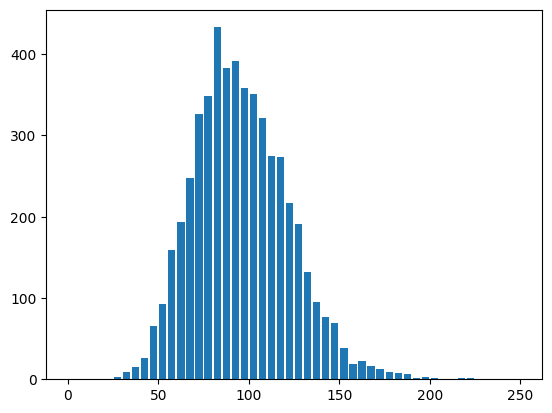

In [10]:
plt.hist(sizes, 50, (0,250), histtype = 'bar', rwidth = 0.8)

# Image Sample

A main in a black and white shirt is skiing with red flags to the right .
A skier is in the snow next to a red flag .
A skier slaloms by a red flag .
A slalom skier wearing red pants and black shirt is skiing past a red flag .
Person skiing on white snow near a red flag .


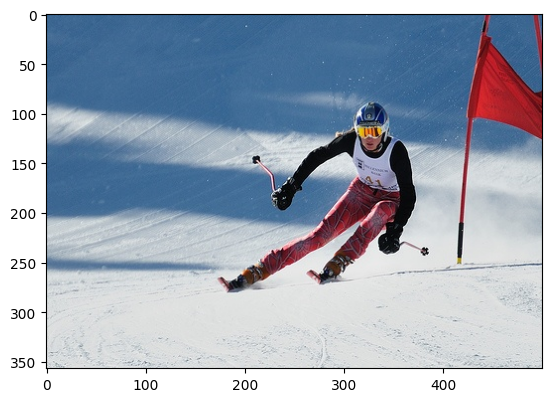

In [11]:
img_name = "3209523192_05a4cef844.jpg"
img = cv2.imread(os.path.join(images_folder, img_name))
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

f = open(captions_file, 'r')
for line in f:
    if line.split(",")[0].strip() == img_name:
        print(line.split(",")[1].strip())
f.close()